In [1]:
#Libreries that we will use
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import romb
from scipy.integrate import solve_ivp, odeint, quad
from scipy.interpolate import interp1d
from IPython.display import Image

In [2]:
hbar=6.582*10**(-1) # Hbar (ueV*ns)
g=1.35 # g-factor fo the GaAs
muB=57.883 # Bohr magneton (ueV/T)
B=0.015 # Magnetic field applied (T)
ET = g * muB * B # Zeeman spliting (ueV)
l = 0.1 # Spin-flip tunneling (ueV)
tau = 0.25 # Sping-conserving (ueV)
u = 2000  #Intradot interaction (ueV)

In [21]:
def hamiltoniano (t,fEps):
    
    H=np.zeros([2,2],dtype=complex)    
    
    if type(fEps).__module__ == 'scipy.interpolate.interpolate':
        epsilon=fEps(t)
        
    else:
        epsilon=fEps
        
    H[0,:]=[Delta(epsilon),l]
    H[1,:]=[l,-Delta(epsilon)]
    return H

def Es(eps):
    return (u + eps - np.sqrt(8 * tau ** 2 + (u + eps) ** 2)) / 2

def Delta(eps):
    return-(Es(eps)+ET)/2

N = 131073


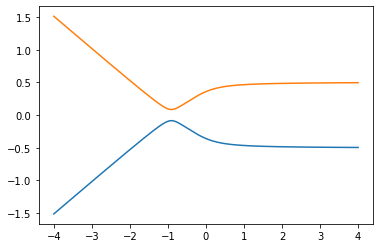

In [47]:
N=2**17+1
print('N =',N)
eps_vector=np.linspace(-4,4,N)*ET-u
hypermatrix=np.zeros([N,2,2],dtype=complex)

for i in range (0,N):
    hypermatrix[i,:,:]=hamiltoniano(0,eps_vector[i])

eigensystem=np.linalg.eigh(hypermatrix)
energies=eigensystem[0]
states=eigensystem[1] 

plt.plot((eps_vector+u)/ET,energies[:,0]/ET)
plt.plot((eps_vector+u)/ET,energies[:,1]/ET);

In [41]:
derivatives=np.zeros([N,2,2],dtype=complex)
for i in range (0,2):
    for j in range (0,2):
        derivatives[:,i,j]=np.gradient(states[:,i,j],eps_vector)
        
factor=np.abs(np.sum(states[:,0,:]*derivatives[:,1,:],axis=1)/(energies[:,0]-energies[:,1]+10**(-16)))
hbar*romb(factor,dx=np.abs(eps_vector[0]-eps_vector[1]),axis=0)

3.2636068492234633

In [50]:
factor=np.zeros(N)
for i in range (0,N):
    factor[i]=np.abs(np.matmul(np.matmul(states[i,0,:],np.array([[1,0],[0,-1]])),states[i,1,:])/(energies[i,0]-energies[i,1])**2)
hbar*romb(factor,dx=np.abs(eps_vector[0]-eps_vector[1]),axis=0)

7.621260508930071